<a href="https://colab.research.google.com/github/ilgarbuzov/datasciencecoursera/blob/master/Computer_Vision_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('\n Reached 60% accuracy so cancelling training')
            self.model.stop_training=True

In [ ]:
callbacks = myCallBack()
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()
#training_images = training_images/255.0
#test_images = test_images/255.0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199 255 144   0   0   0   0  11 135 157   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200 191 255  51   0   0  16 208 227 236  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0  18 233 193 206 186 219 

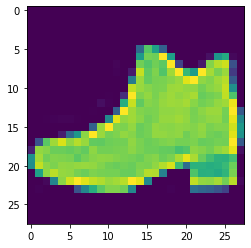

In [ ]:
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(training_images[15])
print(training_labels[15])
print(training_images[15])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(), 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
            

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5307 - accuracy: 0.8225
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5056 - accuracy: 0.8264
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4909 - accuracy: 0.8309
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4771 - accuracy: 0.8365
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4723 - accuracy: 0.8386


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.8218


[0.5577301383018494, 0.8217999935150146]

In [ ]:
classifications = model.predict(test_images)
print(classifications[15])

[5.8034901e-18 1.0000000e+00 1.4036796e-28 8.5389629e-12 1.7414357e-16 0.0000000e+00 1.0989808e-15 0.0000000e+00 3.8847284e-20 0.0000000e+00]


In [ ]:
print(test_labels[15])

1
